In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv("../Big_Mart_Sales/Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Total Columns and Rows in Dataset

In [3]:
train.shape

(8523, 12)

### Data Visualization

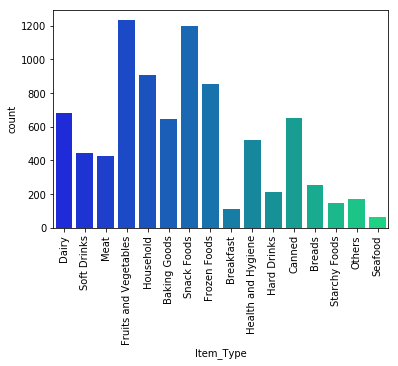

In [4]:
sb.countplot(train.Item_Type, palette='winter')
plt.xticks(rotation = 90)
plt.show()

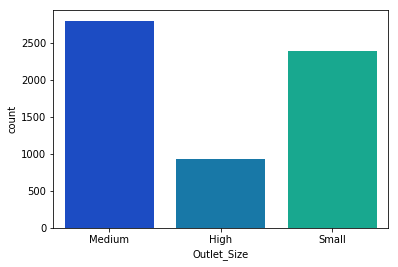

In [5]:
sb.countplot(train.Outlet_Size, palette='winter')
plt.show()

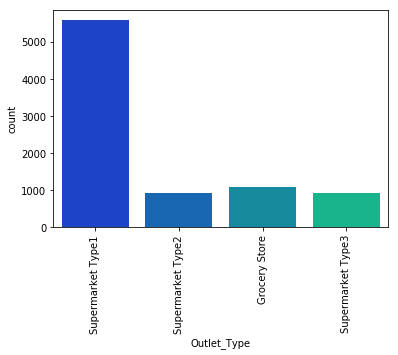

In [6]:
sb.countplot(train.Outlet_Type, palette='winter')
plt.xticks(rotation = 90)
plt.show()

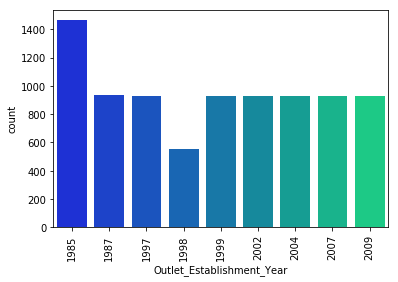

In [7]:
sb.countplot(train.Outlet_Establishment_Year, palette='winter')
plt.xticks(rotation = 90)
plt.show()

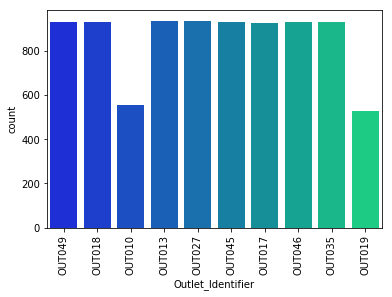

In [8]:
sb.countplot(train.Outlet_Identifier, palette='winter')
plt.xticks(rotation = 90)
plt.show()

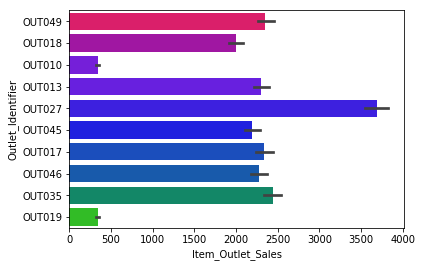

In [9]:
sb.barplot(x = train.Item_Outlet_Sales, y = train.Outlet_Identifier, palette='prism')
plt.show()

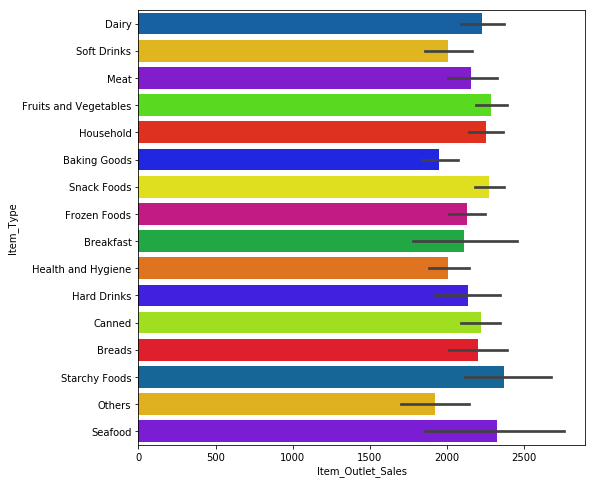

In [10]:
plt.figure(figsize=(8,8))
sb.barplot(x = train.Item_Outlet_Sales, y = train.Item_Type, palette='prism')
plt.show()

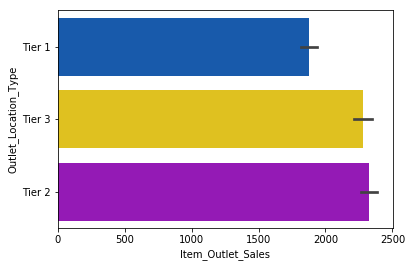

In [11]:
sb.barplot(x = train.Item_Outlet_Sales, y = train.Outlet_Location_Type, palette='prism')
plt.show()

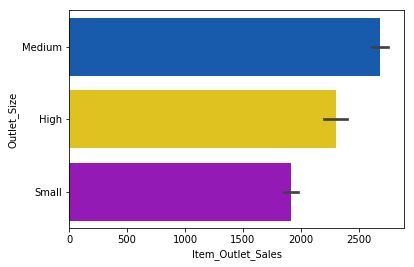

In [12]:
sb.barplot(x = train.Item_Outlet_Sales, y = train.Outlet_Size, palette='prism')
plt.show()

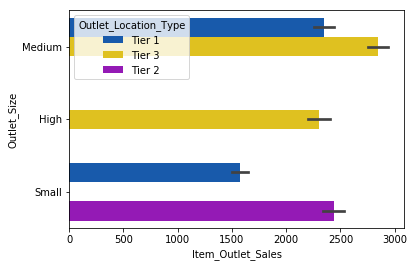

In [13]:
sb.barplot(x = train.Item_Outlet_Sales, y = train.Outlet_Size, hue=train.Outlet_Location_Type, palette='prism')
plt.show()

### Statistical Description

In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Here Item visibility can't have a minimum value 0
### So, treat 0 as a missing information

### Check NaN (missing values) values

In [15]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Check missing values represented by other symbols if any

In [16]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
train.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [18]:
cat_features = train.describe(include=['object']).columns.tolist()
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Check unique values for these cat_features: 

In [19]:
for i in cat_features:
    print("Column:",i)
    print(train[i].unique())
    print("")

Column: Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Column: Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Column: Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Column: Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Column: Outlet_Size
['Medium' nan 'High' 'Small']

Column: Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

Column: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



### Unique values for Item Identifier

In [20]:
train['Item_Identifier'].nunique()

1559

In [21]:
for i in train['Item_Identifier'].unique():
    print(i, end=" ")

FDA15 DRC01 FDN15 FDX07 NCD19 FDP36 FDO10 FDP10 FDH17 FDU28 FDY07 FDA03 FDX32 FDS46 FDF32 FDP49 NCB42 DRI11 FDU02 FDN22 FDW12 NCB30 FDC37 FDR28 NCD06 FDV10 DRJ59 FDE51 FDC14 FDV38 NCS17 FDP33 FDO23 DRH01 NCX29 FDV20 DRZ11 FDX10 FDB34 FDK43 FDA46 FDC02 FDL50 FDM39 NCP05 FDV49 FDL12 FDS02 NCL17 FDM40 FDR13 FDA43 NCP18 FDK21 NCX54 DRK35 FDY21 FDI26 FDM20 FDV27 FDF09 FDY40 FDY45 FDC46 FDH19 FDZ03 DRH37 NCI17 FDJ58 FDH35 FDG02 NCZ18 FDC29 FDQ10 FDN48 FDL04 FDV25 FDD58 FDN04 FDV45 NCL18 FDR12 FDG20 FDZ55 FDQ49 FDN33 FDN27 FDW20 DRG27 DRI25 FDA44 NCR17 FDU04 FDF41 FDB56 FDT28 FDD10 FDW57 DRB48 FDP09 FDH14 FDA47 FDG12 DRE60 DRK49 FDD03 FDS52 FDW39 FDX34 FDV11 FDD17 FDZ16 FDZ46 DRA12 FDY58 NCF19 DRJ13 FDB14 FDJ38 FDW11 FDL40 DRI49 DRG23 NCP30 FDY25 NCH54 NCR53 NCO26 FDB51 FDX44 NCN07 NCC31 NCO55 NCC30 FDI16 FDP16 FDB11 NCB06 FDA45 DRJ25 FDI04 DRK12 FDX20 NCI18 FDB36 FDN13 DRD24 FDQ28 FDM22 FDR07 DRF49 FDW51 DRL01 FDP25 NCM43 FDK44 FDM15 FDS31 FDI32 FDR47 FDB35 NCU05 DRY23 FDO24 FDV39 NCO17 FDU5

### Here in Item Fat Content: Low Fat, low fat and LF are same as Low Fat and Regular and reg are same as Regular. So will correct these preprocessing

In [22]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace("low fat", "Low Fat")
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace("LF", "Low Fat")
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace("reg", "Regular")

In [23]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

### Missing values handling:

### For Item Weight, we will check Mean value of Item Weight for all items categorized by Item Type and also will check Mean value of Item Weight for all items categorized by Item Identifier

In [24]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
train[train['Item_Type'] == 'Dairy']['Item_Weight'].mean(skipna=True)

13.42606890459367

In [26]:
for j in train.Item_Type.unique():
    avg = train[train['Item_Type'] == j]['Item_Weight'].mean(skipna = True)
    print("Average Item Weight of all Items for Item Type %s is %f" %(j, avg))

Average Item Weight of all Items for Item Type Dairy is 13.426069
Average Item Weight of all Items for Item Type Soft Drinks is 11.847460
Average Item Weight of all Items for Item Type Meat is 12.817344
Average Item Weight of all Items for Item Type Fruits and Vegetables is 13.224769
Average Item Weight of all Items for Item Type Household is 13.384736
Average Item Weight of all Items for Item Type Baking Goods is 12.277108
Average Item Weight of all Items for Item Type Snack Foods is 12.987880
Average Item Weight of all Items for Item Type Frozen Foods is 12.867061
Average Item Weight of all Items for Item Type Breakfast is 12.768202
Average Item Weight of all Items for Item Type Health and Hygiene is 13.142314
Average Item Weight of all Items for Item Type Hard Drinks is 11.400328
Average Item Weight of all Items for Item Type Canned is 12.305705
Average Item Weight of all Items for Item Type Breads is 11.346936
Average Item Weight of all Items for Item Type Starchy Foods is 13.69073

In [27]:
for j in train.Item_Identifier.unique():
    avg = train[train['Item_Identifier'] == j]['Item_Weight'].mean(skipna = True)
    print("Average Item Weight of all Items for Item Identifier %s is %f" %(j, avg))

Average Item Weight of all Items for Item Identifier FDA15 is 9.300000
Average Item Weight of all Items for Item Identifier DRC01 is 5.920000
Average Item Weight of all Items for Item Identifier FDN15 is 17.500000
Average Item Weight of all Items for Item Identifier FDX07 is 19.200000
Average Item Weight of all Items for Item Identifier NCD19 is 8.930000
Average Item Weight of all Items for Item Identifier FDP36 is 10.395000
Average Item Weight of all Items for Item Identifier FDO10 is 13.650000
Average Item Weight of all Items for Item Identifier FDP10 is 19.000000
Average Item Weight of all Items for Item Identifier FDH17 is 16.200000
Average Item Weight of all Items for Item Identifier FDU28 is 19.200000
Average Item Weight of all Items for Item Identifier FDY07 is 11.800000
Average Item Weight of all Items for Item Identifier FDA03 is 18.500000
Average Item Weight of all Items for Item Identifier FDX32 is 15.100000
Average Item Weight of all Items for Item Identifier FDS46 is 17.60

Average Item Weight of all Items for Item Identifier DRI49 is 14.150000
Average Item Weight of all Items for Item Identifier DRG23 is 8.880000
Average Item Weight of all Items for Item Identifier NCP30 is 20.500000
Average Item Weight of all Items for Item Identifier FDY25 is 12.000000
Average Item Weight of all Items for Item Identifier NCH54 is 13.500000
Average Item Weight of all Items for Item Identifier NCR53 is 12.150000
Average Item Weight of all Items for Item Identifier NCO26 is 7.235000
Average Item Weight of all Items for Item Identifier FDB51 is 6.920000
Average Item Weight of all Items for Item Identifier FDX44 is 9.300000
Average Item Weight of all Items for Item Identifier NCN07 is 18.500000
Average Item Weight of all Items for Item Identifier NCC31 is 8.020000
Average Item Weight of all Items for Item Identifier NCO55 is 12.800000
Average Item Weight of all Items for Item Identifier NCC30 is 16.600000
Average Item Weight of all Items for Item Identifier FDI16 is 14.0000

Average Item Weight of all Items for Item Identifier FDZ10 is 17.850000
Average Item Weight of all Items for Item Identifier FDZ32 is 7.785000
Average Item Weight of all Items for Item Identifier NCF07 is 9.000000
Average Item Weight of all Items for Item Identifier DRE49 is 20.750000
Average Item Weight of all Items for Item Identifier FDJ08 is 11.100000
Average Item Weight of all Items for Item Identifier FDT39 is 6.260000
Average Item Weight of all Items for Item Identifier FDE08 is 18.200000
Average Item Weight of all Items for Item Identifier FDB57 is 20.250000
Average Item Weight of all Items for Item Identifier NCT54 is 8.695000
Average Item Weight of all Items for Item Identifier FDM25 is 10.695000
Average Item Weight of all Items for Item Identifier FDF20 is 12.850000
Average Item Weight of all Items for Item Identifier FDH27 is 7.075000
Average Item Weight of all Items for Item Identifier FDV60 is 20.200000
Average Item Weight of all Items for Item Identifier FDY59 is 8.19500

Average Item Weight of all Items for Item Identifier NCC06 is 19.000000
Average Item Weight of all Items for Item Identifier FDB17 is 13.150000
Average Item Weight of all Items for Item Identifier FDW43 is 20.100000
Average Item Weight of all Items for Item Identifier FDA27 is 20.350000
Average Item Weight of all Items for Item Identifier FDN32 is 17.500000
Average Item Weight of all Items for Item Identifier FDZ27 is 7.935000
Average Item Weight of all Items for Item Identifier FDW23 is 5.765000
Average Item Weight of all Items for Item Identifier FDU01 is 20.250000
Average Item Weight of all Items for Item Identifier FDF10 is 15.500000
Average Item Weight of all Items for Item Identifier DRH03 is 17.250000
Average Item Weight of all Items for Item Identifier FDW27 is 5.860000
Average Item Weight of all Items for Item Identifier DRI13 is 15.350000
Average Item Weight of all Items for Item Identifier NCR05 is 10.100000
Average Item Weight of all Items for Item Identifier FDI35 is 14.00

Average Item Weight of all Items for Item Identifier FDC53 is 8.680000
Average Item Weight of all Items for Item Identifier FDQ09 is 7.235000
Average Item Weight of all Items for Item Identifier DRE25 is 15.350000
Average Item Weight of all Items for Item Identifier FDL08 is 10.800000
Average Item Weight of all Items for Item Identifier FDW03 is 5.630000
Average Item Weight of all Items for Item Identifier FDC17 is 12.150000
Average Item Weight of all Items for Item Identifier FDE34 is 9.195000
Average Item Weight of all Items for Item Identifier FDO44 is 12.600000
Average Item Weight of all Items for Item Identifier NCF31 is 9.130000
Average Item Weight of all Items for Item Identifier FDG14 is 9.000000
Average Item Weight of all Items for Item Identifier NCH30 is 17.100000
Average Item Weight of all Items for Item Identifier FDR36 is 6.715000
Average Item Weight of all Items for Item Identifier NCJ30 is 5.820000
Average Item Weight of all Items for Item Identifier FDR08 is 18.700000


Average Item Weight of all Items for Item Identifier FDF08 is 14.300000
Average Item Weight of all Items for Item Identifier FDH58 is 12.300000
Average Item Weight of all Items for Item Identifier FDE02 is 8.710000
Average Item Weight of all Items for Item Identifier FDR23 is 15.850000
Average Item Weight of all Items for Item Identifier FDY35 is 17.600000
Average Item Weight of all Items for Item Identifier FDG44 is 6.130000
Average Item Weight of all Items for Item Identifier FDQ23 is 6.550000
Average Item Weight of all Items for Item Identifier FDY22 is 16.500000
Average Item Weight of all Items for Item Identifier NCN41 is 17.000000
Average Item Weight of all Items for Item Identifier FDO36 is 19.700000
Average Item Weight of all Items for Item Identifier FDH20 is 16.100000
Average Item Weight of all Items for Item Identifier FDN12 is 15.600000
Average Item Weight of all Items for Item Identifier FDB09 is 16.250000
Average Item Weight of all Items for Item Identifier FDA09 is 13.35

Average Item Weight of all Items for Item Identifier FDF34 is 9.300000
Average Item Weight of all Items for Item Identifier FDD04 is 16.000000
Average Item Weight of all Items for Item Identifier NCJ31 is 19.200000
Average Item Weight of all Items for Item Identifier FDO57 is 20.750000
Average Item Weight of all Items for Item Identifier FDM36 is 11.650000
Average Item Weight of all Items for Item Identifier NCY05 is 13.500000
Average Item Weight of all Items for Item Identifier DRK11 is 8.210000
Average Item Weight of all Items for Item Identifier NCL30 is 18.100000
Average Item Weight of all Items for Item Identifier DRJ39 is 20.250000
Average Item Weight of all Items for Item Identifier NCP06 is 20.700000
Average Item Weight of all Items for Item Identifier FDZ44 is 8.185000
Average Item Weight of all Items for Item Identifier FDV46 is 18.200000
Average Item Weight of all Items for Item Identifier DRG03 is 14.500000
Average Item Weight of all Items for Item Identifier FDU37 is 9.500

Average Item Weight of all Items for Item Identifier FDH24 is 20.700000
Average Item Weight of all Items for Item Identifier FDT52 is 9.695000
Average Item Weight of all Items for Item Identifier FDT04 is 17.250000
Average Item Weight of all Items for Item Identifier NCL54 is 12.600000
Average Item Weight of all Items for Item Identifier FDQ32 is 17.850000
Average Item Weight of all Items for Item Identifier FDE29 is 8.905000
Average Item Weight of all Items for Item Identifier FDB37 is 20.250000
Average Item Weight of all Items for Item Identifier FDN46 is 7.210000
Average Item Weight of all Items for Item Identifier FDV28 is 16.100000
Average Item Weight of all Items for Item Identifier FDW37 is 19.200000
Average Item Weight of all Items for Item Identifier FDV40 is 17.350000
Average Item Weight of all Items for Item Identifier FDZ57 is 10.000000
Average Item Weight of all Items for Item Identifier FDY46 is 18.600000
Average Item Weight of all Items for Item Identifier FDX45 is 16.75

Average Item Weight of all Items for Item Identifier DRJ49 is 6.865000
Average Item Weight of all Items for Item Identifier FDP26 is 7.785000
Average Item Weight of all Items for Item Identifier FDO32 is 6.360000
Average Item Weight of all Items for Item Identifier FDR34 is 17.000000
Average Item Weight of all Items for Item Identifier FDU59 is 5.780000
Average Item Weight of all Items for Item Identifier FDN31 is 11.500000
Average Item Weight of all Items for Item Identifier FDT55 is 13.600000
Average Item Weight of all Items for Item Identifier FDC03 is 8.575000
Average Item Weight of all Items for Item Identifier FDL14 is 8.115000
Average Item Weight of all Items for Item Identifier FDP39 is 12.650000
Average Item Weight of all Items for Item Identifier FDT11 is 5.940000
Average Item Weight of all Items for Item Identifier FDU48 is 18.850000
Average Item Weight of all Items for Item Identifier FDT45 is 15.850000
Average Item Weight of all Items for Item Identifier FDE56 is 17.250000

Average Item Weight of all Items for Item Identifier FDP34 is 12.850000
Average Item Weight of all Items for Item Identifier FDI02 is 15.700000
Average Item Weight of all Items for Item Identifier FDG50 is 7.405000
Average Item Weight of all Items for Item Identifier FDV48 is 9.195000
Average Item Weight of all Items for Item Identifier FDH02 is 7.270000
Average Item Weight of all Items for Item Identifier NCD43 is 8.850000
Average Item Weight of all Items for Item Identifier FDE46 is 18.600000
Average Item Weight of all Items for Item Identifier NCO42 is 21.250000
Average Item Weight of all Items for Item Identifier FDR40 is 9.100000
Average Item Weight of all Items for Item Identifier DRE48 is 8.430000
Average Item Weight of all Items for Item Identifier FDV16 is 7.750000
Average Item Weight of all Items for Item Identifier FDY19 is 19.750000
Average Item Weight of all Items for Item Identifier FDD41 is 6.765000
Average Item Weight of all Items for Item Identifier NCK07 is 10.650000


Average Item Weight of all Items for Item Identifier FDX24 is 8.355000
Average Item Weight of all Items for Item Identifier NCS05 is 11.500000
Average Item Weight of all Items for Item Identifier FDK04 is 7.360000
Average Item Weight of all Items for Item Identifier FDI58 is 7.640000
Average Item Weight of all Items for Item Identifier FDG58 is 10.695000
Average Item Weight of all Items for Item Identifier FDI60 is 7.220000
Average Item Weight of all Items for Item Identifier FDW52 is 14.000000
Average Item Weight of all Items for Item Identifier FDN38 is 6.615000
Average Item Weight of all Items for Item Identifier FDU39 is 18.850000
Average Item Weight of all Items for Item Identifier FDR25 is 17.000000
Average Item Weight of all Items for Item Identifier FDM44 is 12.500000
Average Item Weight of all Items for Item Identifier FDM27 is 12.350000
Average Item Weight of all Items for Item Identifier NCA29 is 10.500000
Average Item Weight of all Items for Item Identifier NCJ43 is 6.63500

Average Item Weight of all Items for Item Identifier NCU06 is 17.600000
Average Item Weight of all Items for Item Identifier FDM38 is 5.885000
Average Item Weight of all Items for Item Identifier FDT15 is 12.150000
Average Item Weight of all Items for Item Identifier NCJ19 is 18.600000
Average Item Weight of all Items for Item Identifier NCI06 is 11.300000
Average Item Weight of all Items for Item Identifier FDV19 is 14.850000
Average Item Weight of all Items for Item Identifier FDQ47 is 7.155000
Average Item Weight of all Items for Item Identifier NCW06 is 16.200000
Average Item Weight of all Items for Item Identifier FDO16 is 5.480000
Average Item Weight of all Items for Item Identifier DRN35 is 8.010000
Average Item Weight of all Items for Item Identifier FDV55 is 17.750000
Average Item Weight of all Items for Item Identifier FDB03 is 17.750000
Average Item Weight of all Items for Item Identifier FDJ32 is 10.695000
Average Item Weight of all Items for Item Identifier FDC34 is 16.000

### We will select second approach i.e. wherever there are missing info of Item Weight for Unique Item Identifier, we will replace those missing info with Mean Value

In [28]:
iwvalues = []; iwindex = []

for j in train.Item_Identifier.unique():
    
    avg = train[train['Item_Identifier'] == j]['Item_Weight'].mean(skipna = True)
    
    result = train[train['Item_Identifier'] == j]['Item_Weight'].fillna(round(avg, 2))
    
    for k in result.values:
        iwvalues.append(k)
    for k in result.index:
        iwindex.append(k)

In [29]:
result = pd.Series(iwvalues, index=iwindex)
result.head(10)

0       9.30
831     9.30
2599    9.30
2643    9.30
4874    9.30
5413    9.30
6696    9.30
7543    9.30
1       5.92
2272    5.92
dtype: float64

In [30]:
result.sort_index(inplace=True)

In [31]:
result.head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7    19.000
8    16.200
9    19.200
dtype: float64

### Checking index positions for columns

In [32]:
for i in enumerate(train.columns):
    print(i)

(0, 'Item_Identifier')
(1, 'Item_Weight')
(2, 'Item_Fat_Content')
(3, 'Item_Visibility')
(4, 'Item_Type')
(5, 'Item_MRP')
(6, 'Outlet_Identifier')
(7, 'Outlet_Establishment_Year')
(8, 'Outlet_Size')
(9, 'Outlet_Location_Type')
(10, 'Outlet_Type')
(11, 'Item_Outlet_Sales')


### Drop Original Item Weight Column and Place new same named column containing non null values

In [33]:
train.drop('Item_Weight', axis=1, inplace=True)

In [34]:
train.insert(1, 'Item_Weight', result.values)

### Check Missing Info for Item Weight

In [35]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Let's find out which FOUR observations we have missing info

In [36]:
f = train['Item_Weight'].isnull()
f.head()

0    False
1    False
2    False
3    False
4    False
Name: Item_Weight, dtype: bool

In [37]:
j = train['Item_Weight'].isnull()
for i,k in zip(j.index, j.values):
    if k == True:
        print("Row Label:",i)
        print(train.loc[i])
        print("")

Row Label: 927
Item_Identifier                          FDN52
Item_Weight                                NaN
Item_Fat_Content                       Regular
Item_Visibility                       0.130933
Item_Type                         Frozen Foods
Item_MRP                               86.9198
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                      1569.96
Name: 927, dtype: object

Row Label: 1922
Item_Identifier                          FDK57
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                      0.0799041
Item_Type                          Snack Foods
Item_MRP                               120.044
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Out

### Drop these 4 Rows

In [38]:
j = train['Item_Weight'].isnull()
for k, m in zip(j.index, j.values):
    if m == True:
        train.drop(labels = k, axis=0, inplace=True)

In [39]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Missing values handling for Item Visibility same as we have done for Item Weight

In [40]:
train[train['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944


In [41]:
train['Item_Visibility'].replace(0.0, np.NaN, inplace = True)

In [42]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
for j in train.Item_Type.unique():
    avg = train[train['Item_Type'] == j]['Item_Visibility'].mean(skipna = True)
    print("Average Item Visibility of all Items for Item Type %s is %f" %(j, avg))

Average Item Visibility of all Items for Item Type Dairy is 0.076774
Average Item Visibility of all Items for Item Type Soft Drinks is 0.069264
Average Item Visibility of all Items for Item Type Meat is 0.065360
Average Item Visibility of all Items for Item Type Fruits and Vegetables is 0.073719
Average Item Visibility of all Items for Item Type Household is 0.064963
Average Item Visibility of all Items for Item Type Baking Goods is 0.074137
Average Item Visibility of all Items for Item Type Snack Foods is 0.070858
Average Item Visibility of all Items for Item Type Frozen Foods is 0.069728
Average Item Visibility of all Items for Item Type Breakfast is 0.088126
Average Item Visibility of all Items for Item Type Health and Hygiene is 0.058958
Average Item Visibility of all Items for Item Type Hard Drinks is 0.070547
Average Item Visibility of all Items for Item Type Canned is 0.071779
Average Item Visibility of all Items for Item Type Breads is 0.071069
Average Item Visibility of all It

In [44]:
for j in train.Item_Identifier.unique():
    avg = train[train['Item_Identifier'] == j]['Item_Visibility'].mean(skipna = True)
    print("Average Item Visibility of all Items for Item Identifier %s is %f" %(j, avg))

Average Item Visibility of all Items for Item Identifier FDA15 is 0.017387
Average Item Visibility of all Items for Item Identifier DRC01 is 0.019219
Average Item Visibility of all Items for Item Identifier FDN15 is 0.020145
Average Item Visibility of all Items for Item Identifier FDX07 is 0.022911
Average Item Visibility of all Items for Item Identifier NCD19 is 0.016164
Average Item Visibility of all Items for Item Identifier FDP36 is 0.091392
Average Item Visibility of all Items for Item Identifier FDO10 is 0.014183
Average Item Visibility of all Items for Item Identifier FDP10 is 0.128152
Average Item Visibility of all Items for Item Identifier FDH17 is 0.018459
Average Item Visibility of all Items for Item Identifier FDU28 is 0.108114
Average Item Visibility of all Items for Item Identifier FDY07 is 0.121880
Average Item Visibility of all Items for Item Identifier FDA03 is 0.051553
Average Item Visibility of all Items for Item Identifier FDX32 is 0.112573
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDD17 is 0.036337
Average Item Visibility of all Items for Item Identifier FDZ16 is 0.197807
Average Item Visibility of all Items for Item Identifier FDZ46 is 0.069315
Average Item Visibility of all Items for Item Identifier DRA12 is 0.047934
Average Item Visibility of all Items for Item Identifier FDY58 is 0.040069
Average Item Visibility of all Items for Item Identifier NCF19 is 0.040410
Average Item Visibility of all Items for Item Identifier DRJ13 is 0.070065
Average Item Visibility of all Items for Item Identifier FDB14 is 0.114278
Average Item Visibility of all Items for Item Identifier FDJ38 is 0.040274
Average Item Visibility of all Items for Item Identifier FDW11 is 0.048837
Average Item Visibility of all Items for Item Identifier FDL40 is 0.012918
Average Item Visibility of all Items for Item Identifier DRI49 is 0.183779
Average Item Visibility of all Items for Item Identifier DRG23 is 0.086748
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier DRJ51 is 0.088140
Average Item Visibility of all Items for Item Identifier FDU44 is 0.065798
Average Item Visibility of all Items for Item Identifier FDL43 is 0.027070
Average Item Visibility of all Items for Item Identifier FDF05 is 0.026896
Average Item Visibility of all Items for Item Identifier DRF15 is 0.041572
Average Item Visibility of all Items for Item Identifier FDL20 is 0.142341
Average Item Visibility of all Items for Item Identifier FDV32 is 0.100004
Average Item Visibility of all Items for Item Identifier FDJ34 is 0.093743
Average Item Visibility of all Items for Item Identifier FDG08 is 0.186236
Average Item Visibility of all Items for Item Identifier FDQ04 is 0.125046
Average Item Visibility of all Items for Item Identifier FDW13 is 0.111903
Average Item Visibility of all Items for Item Identifier FDY03 is 0.089736
Average Item Visibility of all Items for Item Identifier FDS12 is 0.215715
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDL32 is 0.166306
Average Item Visibility of all Items for Item Identifier FDZ07 is 0.138528
Average Item Visibility of all Items for Item Identifier NCW53 is 0.033799
Average Item Visibility of all Items for Item Identifier NCA54 is 0.042825
Average Item Visibility of all Items for Item Identifier FDX09 is 0.073412
Average Item Visibility of all Items for Item Identifier FDO51 is 0.041960
Average Item Visibility of all Items for Item Identifier FDW49 is 0.090361
Average Item Visibility of all Items for Item Identifier FDB27 is 0.061597
Average Item Visibility of all Items for Item Identifier FDF45 is 0.012235
Average Item Visibility of all Items for Item Identifier FDV02 is 0.060570
Average Item Visibility of all Items for Item Identifier FDY28 is 0.181051
Average Item Visibility of all Items for Item Identifier FDX31 is 0.016261
Average Item Visibility of all Items for Item Identifier FDR43 is 0.175127
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDG53 is 0.051085
Average Item Visibility of all Items for Item Identifier DRG01 is 0.051565
Average Item Visibility of all Items for Item Identifier FDB38 is 0.027340
Average Item Visibility of all Items for Item Identifier FDI27 is 0.045967
Average Item Visibility of all Items for Item Identifier FDD29 is 0.019974
Average Item Visibility of all Items for Item Identifier NCR41 is 0.018049
Average Item Visibility of all Items for Item Identifier FDW44 is 0.039148
Average Item Visibility of all Items for Item Identifier FDU21 is 0.084987
Average Item Visibility of all Items for Item Identifier FDI14 is 0.089784
Average Item Visibility of all Items for Item Identifier FDW50 is 0.083818
Average Item Visibility of all Items for Item Identifier FDT31 is 0.012474
Average Item Visibility of all Items for Item Identifier FDJ14 is 0.050151
Average Item Visibility of all Items for Item Identifier NCQ43 is 0.123297
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier NCQ38 is 0.014824
Average Item Visibility of all Items for Item Identifier FDN20 is 0.026189
Average Item Visibility of all Items for Item Identifier NCN29 is 0.016455
Average Item Visibility of all Items for Item Identifier FDI28 is 0.026330
Average Item Visibility of all Items for Item Identifier FDZ28 is 0.060318
Average Item Visibility of all Items for Item Identifier FDO52 is 0.077236
Average Item Visibility of all Items for Item Identifier FDU10 is 0.045811
Average Item Visibility of all Items for Item Identifier FDS28 is 0.082489
Average Item Visibility of all Items for Item Identifier FDJ03 is 0.084685
Average Item Visibility of all Items for Item Identifier FDQ51 is 0.020482
Average Item Visibility of all Items for Item Identifier NCK06 is 0.009805
Average Item Visibility of all Items for Item Identifier FDY09 is 0.037215
Average Item Visibility of all Items for Item Identifier FDA10 is 0.163246
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDN56 is 0.117151
Average Item Visibility of all Items for Item Identifier FDO49 is 0.039229
Average Item Visibility of all Items for Item Identifier FDC09 is 0.029882
Average Item Visibility of all Items for Item Identifier NCZ41 is 0.064529
Average Item Visibility of all Items for Item Identifier FDP19 is 0.202824
Average Item Visibility of all Items for Item Identifier FDQ24 is 0.084891
Average Item Visibility of all Items for Item Identifier DRL11 is 0.048043
Average Item Visibility of all Items for Item Identifier FDF21 is 0.066773
Average Item Visibility of all Items for Item Identifier FDS51 is 0.032145
Average Item Visibility of all Items for Item Identifier FDE45 is 0.047966
Average Item Visibility of all Items for Item Identifier FDX50 is 0.080968
Average Item Visibility of all Items for Item Identifier NCN14 is 0.113779
Average Item Visibility of all Items for Item Identifier FDQ21 is 0.019464
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDL26 is 0.073311
Average Item Visibility of all Items for Item Identifier DRM35 is 0.070491
Average Item Visibility of all Items for Item Identifier DRD15 is 0.068376
Average Item Visibility of all Items for Item Identifier FDV04 is 0.164406
Average Item Visibility of all Items for Item Identifier FDG46 is 0.040712
Average Item Visibility of all Items for Item Identifier NCN05 is 0.014491
Average Item Visibility of all Items for Item Identifier FDO58 is 0.039576
Average Item Visibility of all Items for Item Identifier DRH49 is 0.029304
Average Item Visibility of all Items for Item Identifier NCZ05 is 0.072662
Average Item Visibility of all Items for Item Identifier NCP54 is 0.035247
Average Item Visibility of all Items for Item Identifier FDF57 is 0.066232
Average Item Visibility of all Items for Item Identifier FDA02 is 0.032919
Average Item Visibility of all Items for Item Identifier DRJ37 is 0.061118
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDY33 is 0.109437
Average Item Visibility of all Items for Item Identifier DRH51 is 0.115479
Average Item Visibility of all Items for Item Identifier FDI50 is 0.030855
Average Item Visibility of all Items for Item Identifier FDB60 is 0.031774
Average Item Visibility of all Items for Item Identifier FDA20 is 0.066681
Average Item Visibility of all Items for Item Identifier NCX05 is 0.114419
Average Item Visibility of all Items for Item Identifier DRF37 is 0.084516
Average Item Visibility of all Items for Item Identifier FDJ26 is 0.084783
Average Item Visibility of all Items for Item Identifier FDZ58 is 0.057820
Average Item Visibility of all Items for Item Identifier FDZ50 is 0.079524
Average Item Visibility of all Items for Item Identifier NCG18 is 0.026839
Average Item Visibility of all Items for Item Identifier FDH50 is 0.161571
Average Item Visibility of all Items for Item Identifier DRO35 is 0.034650
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier NCM29 is 0.019357
Average Item Visibility of all Items for Item Identifier FDD53 is 0.056844
Average Item Visibility of all Items for Item Identifier NCP41 is 0.021998
Average Item Visibility of all Items for Item Identifier FDJ28 is 0.026812
Average Item Visibility of all Items for Item Identifier FDH44 is 0.028817
Average Item Visibility of all Items for Item Identifier NCY54 is 0.177540
Average Item Visibility of all Items for Item Identifier DRA59 is 0.153963
Average Item Visibility of all Items for Item Identifier FDS55 is 0.089910
Average Item Visibility of all Items for Item Identifier NCN19 is 0.013938
Average Item Visibility of all Items for Item Identifier FDH09 is 0.056125
Average Item Visibility of all Items for Item Identifier FDS25 is 0.140202
Average Item Visibility of all Items for Item Identifier NCI30 is 0.066418
Average Item Visibility of all Items for Item Identifier FDM33 is 0.087861
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDP37 is 0.164909
Average Item Visibility of all Items for Item Identifier FDJ09 is 0.058541
Average Item Visibility of all Items for Item Identifier FDC57 is 0.064885
Average Item Visibility of all Items for Item Identifier DRD27 is 0.028353
Average Item Visibility of all Items for Item Identifier FDI12 is 0.100631
Average Item Visibility of all Items for Item Identifier FDQ33 is 0.091421
Average Item Visibility of all Items for Item Identifier FDQ27 is 0.052622
Average Item Visibility of all Items for Item Identifier FDH34 is 0.035780
Average Item Visibility of all Items for Item Identifier FDB20 is 0.052066
Average Item Visibility of all Items for Item Identifier DRL60 is 0.032595
Average Item Visibility of all Items for Item Identifier DRJ23 is 0.048759
Average Item Visibility of all Items for Item Identifier FDQ26 is 0.067948
Average Item Visibility of all Items for Item Identifier NCA06 is 0.143369
Average Item Visibility o

Average Item Visibility of all Items for Item Identifier FDU35 is 0.105711
Average Item Visibility of all Items for Item Identifier FDS59 is 0.052828
Average Item Visibility of all Items for Item Identifier FDL15 is 0.058394
Average Item Visibility of all Items for Item Identifier FDB28 is 0.109276
Average Item Visibility of all Items for Item Identifier FDY37 is 0.026548
Average Item Visibility of all Items for Item Identifier FDP58 is 0.169242
Average Item Visibility of all Items for Item Identifier FDF58 is 0.009558
Average Item Visibility of all Items for Item Identifier FDB47 is 0.071455
Average Item Visibility of all Items for Item Identifier FDV14 is 0.044505
Average Item Visibility of all Items for Item Identifier FDC23 is 0.017979
Average Item Visibility of all Items for Item Identifier FDU33 is 0.166709
Average Item Visibility of all Items for Item Identifier DRO59 is 0.064445
Average Item Visibility of all Items for Item Identifier FDD48 is 0.030251
Average Item Visibility o

In [45]:
iwvalues = []; iwindex = []

for j in train.Item_Identifier.unique():
    
    avg = train[train['Item_Identifier'] == j]['Item_Visibility'].mean(skipna = True)
    
    result = train[train['Item_Identifier'] == j]['Item_Visibility'].fillna(avg)
    
    for k in result.values:
        iwvalues.append(k)
    for k in result.index:
        iwindex.append(k)

In [46]:
result = pd.Series(iwvalues, index=iwindex)
result.head()

0       0.016047
831     0.016055
2599    0.016019
2643    0.016088
4874    0.026818
dtype: float64

In [47]:
result.sort_index(inplace=True)

In [48]:
result.head()

0    0.016047
1    0.019278
2    0.016760
3    0.022911
4    0.016164
dtype: float64

In [49]:
train.drop('Item_Visibility', axis=1, inplace=True)

In [50]:
train.insert(3, 'Item_Visibility', result.values)

In [51]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Missing values handling for Outlet Size

### Check Unique values of Outlet Identifier, and find out Outlet Size for each Outlet Identifier

In [52]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [53]:
train.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          527
OUT027             Medium         932
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

### Find info for each unique Outlet identified by its Outlet Identifier including Outlet Size, Outlet Location Type and Outlet Type

In [54]:
for i in train['Outlet_Identifier'].unique():
    os = train[train['Outlet_Identifier'] == i]['Outlet_Size'].values[0]
    olt = train[train['Outlet_Identifier'] == i]['Outlet_Location_Type'].values[0]
    ot = train[train['Outlet_Identifier'] == i]['Outlet_Type'].values[0]
    print("Outlet_Identifier:", i, "| Outlet_Size:", os)
    print("Outlet_Location_Type:", olt, "| Outlet_Type:", ot)
    print("")

Outlet_Identifier: OUT049 | Outlet_Size: Medium
Outlet_Location_Type: Tier 1 | Outlet_Type: Supermarket Type1

Outlet_Identifier: OUT018 | Outlet_Size: Medium
Outlet_Location_Type: Tier 3 | Outlet_Type: Supermarket Type2

Outlet_Identifier: OUT010 | Outlet_Size: nan
Outlet_Location_Type: Tier 3 | Outlet_Type: Grocery Store

Outlet_Identifier: OUT013 | Outlet_Size: High
Outlet_Location_Type: Tier 3 | Outlet_Type: Supermarket Type1

Outlet_Identifier: OUT027 | Outlet_Size: Medium
Outlet_Location_Type: Tier 3 | Outlet_Type: Supermarket Type3

Outlet_Identifier: OUT045 | Outlet_Size: nan
Outlet_Location_Type: Tier 2 | Outlet_Type: Supermarket Type1

Outlet_Identifier: OUT017 | Outlet_Size: nan
Outlet_Location_Type: Tier 2 | Outlet_Type: Supermarket Type1

Outlet_Identifier: OUT046 | Outlet_Size: Small
Outlet_Location_Type: Tier 1 | Outlet_Type: Supermarket Type1

Outlet_Identifier: OUT035 | Outlet_Size: Small
Outlet_Location_Type: Tier 2 | Outlet_Type: Supermarket Type1

Outlet_Identifier:

### After analysis, we came across that OUT010 should have outlet size Small, OUT017 should have Small and OUT045 should also have Small Outlet Size

### Make these replacements

In [55]:
r1 = train[train['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].fillna("Small")

In [56]:
r2 = train[train['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].fillna("Small")

In [57]:
r3 = train[train['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].fillna("Small")

In [58]:
result = pd.concat([r1, r2, r3], axis=0)

In [59]:
result.head()

3     Small
28    Small
30    Small
45    Small
65    Small
Name: Outlet_Size, dtype: object

In [60]:
result.sort_index(inplace=True)

In [61]:
result.head()

3     Small
8     Small
9     Small
25    Small
28    Small
Name: Outlet_Size, dtype: object

### Make a series which contain Non Null values of Outlet Size

In [62]:
osindex = []; osvalues = []
for i, j in train['Outlet_Size'].isnull().items():
    if j == False:
        osindex.append(i)
        osvalues.append(train['Outlet_Size'][i])

In [63]:
remaining_items = pd.Series(osvalues, index=osindex)
remaining_items.head()

0    Medium
1    Medium
2    Medium
4      High
5    Medium
dtype: object

### Concat both these series

In [64]:
result = pd.concat([result, remaining_items], axis=0)

In [65]:
result.sort_index(inplace=True)

In [66]:
result.head()

0    Medium
1    Medium
2    Medium
3     Small
4      High
dtype: object

### Drop original Outlet Size column which contain Null Values and Replace the new column named as same which will contain Non Null Values

In [67]:
train.drop('Outlet_Size', axis=1, inplace=True)

In [68]:
train.insert(8, 'Outlet_Size', result)

In [69]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Check Outliers presence in Numeric Columns

In [70]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [71]:
numeric_cols = [i for i in train.columns.tolist() if train[i].dtype == float]

In [72]:
numeric_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

Column: Item_Weight


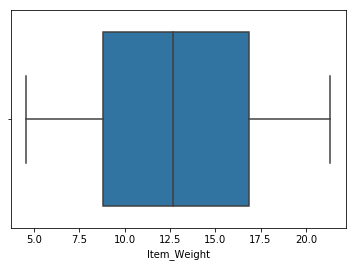


Column: Item_Visibility


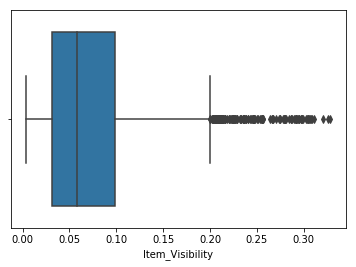


Column: Item_MRP


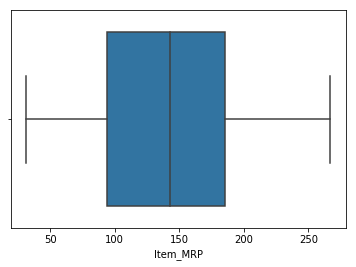


Column: Item_Outlet_Sales


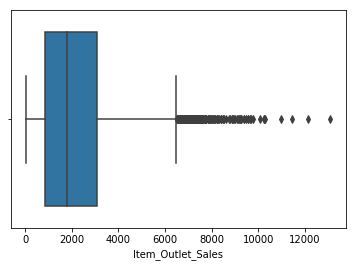

In [73]:
for i in numeric_cols:
    print("Column:", i)
    sb.boxplot(train[i])
    plt.show()
    print("")

In [74]:
trainnew = train.copy()

### Remove Outliers

In [75]:
def outlier_check():
    outliers = set()

    for i in ['Item_Visibility', 'Item_Outlet_Sales']:
        q1 = np.percentile(trainnew[i], 25)
        q3 = np.percentile(trainnew[i], 75)
        iqr = q3 - q1
        c1 = q1 - (1.5*iqr)
        c2 = q3 + (1.5*iqr)
        result = trainnew[(trainnew[i] > c2) | (trainnew[i] < c1)]
        print("Outliers present in column %s are %d" %(i, result.shape[0]))
        outliers.update(result.index.tolist())

    print("Total Outliers to be Remove:", len(outliers))
    trainnew.drop(labels=list(outliers), axis=0, inplace=True)
    print("Total Rows Remaining in Dataset:", trainnew.shape[0])

In [76]:
outlier_check()

Outliers present in column Item_Visibility are 145
Outliers present in column Item_Outlet_Sales are 186
Total Outliers to be Remove: 330
Total Rows Remaining in Dataset: 8189


In [77]:
trainnew.shape

(8189, 12)

In [78]:
trainnew.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Create a new column which contains age of the outlet

In [79]:
import datetime

In [80]:
today = datetime.date.today()

In [81]:
today

datetime.date(2018, 12, 28)

In [82]:
today.year

2018

In [83]:
trainnew['Age_of_Outlet'] = trainnew['Outlet_Establishment_Year'].apply(lambda i : today.year - i)

In [84]:
trainnew.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


### Drop unnecessary columns Item Identifier, Outlet Identifier, Outlet Establishment Year

In [85]:
trainnew.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [86]:
trainnew.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Outlet
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,9
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,20
4,8.93,Low Fat,0.016164,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,31


In [87]:
r2scores = []; RMAE = []; algos = []

### Prepare data for Linear Regression:

In [88]:
trainnewlr = trainnew.copy()

### Seperate features and target

In [89]:
X = trainnewlr.drop("Item_Outlet_Sales", axis = 1)
y = trainnewlr['Item_Outlet_Sales']

### Applying standard scaling

In [90]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age_of_Outlet
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,19
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,9
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,19
3,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,20
4,8.93,Low Fat,0.016164,Household,53.8614,High,Tier 3,Supermarket Type1,31


In [91]:
X_scaling =  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age_of_Outlet']

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scalar = StandardScaler()

In [94]:
for i in X_scaling:
    X[i] = scalar.fit_transform(X[i].values.reshape(-1,1))

In [95]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age_of_Outlet
0,-0.770692,Low Fat,-1.149717,Dairy,1.797440,Medium,Tier 1,Supermarket Type1,-0.109446
1,-1.497729,Regular,-1.078020,Soft Drinks,-1.476348,Medium,Tier 3,Supermarket Type2,-1.316357
2,0.993127,Low Fat,-1.133900,Meat,0.039997,Medium,Tier 1,Supermarket Type1,-0.109446
3,1.358796,Regular,-0.997417,Fruits and Vegetables,0.697500,Small,Tier 3,Grocery Store,0.011245
4,-0.850279,Low Fat,-1.147121,Household,-1.385509,High,Tier 3,Supermarket Type1,1.338848


In [96]:
y = scalar.fit_transform(y.values.reshape(-1,1))

In [97]:
y

array([[ 1.09705019],
       [-1.09458261],
       [ 0.00655329],
       ...,
       [-0.59543647],
       [-0.16101087],
       [-0.88002956]])

### Dummy variable creation

In [98]:
cat_features = X.describe(include=['object']).columns.tolist()

In [99]:
cat_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [100]:
pd.get_dummies(X[cat_features]).head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [101]:
X = pd.get_dummies(X, columns = cat_features, drop_first = True)

In [102]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Age_of_Outlet,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.770692,-1.149717,1.797440,-0.109446,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,-1.497729,-1.078020,-1.476348,-1.316357,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,0.993127,-1.133900,0.039997,-0.109446,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.358796,-0.997417,0.697500,0.011245,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,-0.850279,-1.147121,-1.385509,1.338848,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Check relationship between IV and DV

In [103]:
df_train = pd.read_csv("../Big_Mart_Sales/Train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### Train Test Split for Linear Regression

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Making predictive model using Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model_lr = LinearRegression()

In [109]:
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
y_predict = model_lr.predict(x_test)

### Evaluate the Model

In [111]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [112]:
print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.543459826863099


In [113]:
print("MSE:", mean_squared_error(y_test, y_predict))

MSE: 0.42515244367973926


In [114]:
print("MAE", mean_absolute_error(y_test, y_predict))

MAE 0.5007797817849973


In [115]:
print("RMAE:", np.sqrt(mean_absolute_error(y_test, y_predict)))

RMAE: 0.7076579553604957


In [116]:
r2scores.append(r2_score(y_test, y_predict))
RMAE.append(np.sqrt(mean_absolute_error(y_test, y_predict)))
algos.append("Linear Regression")

### Prepare data for Non Linear Regression Algos

In [117]:
trainnewnl = trainnew.copy()

### Seperate features and target

In [118]:
X = trainnewnl.drop("Item_Outlet_Sales", axis = 1)
y = trainnewnl['Item_Outlet_Sales']

### Label Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
label = LabelEncoder()

In [121]:
cat_features = X.describe(include=['object']).columns.tolist()

In [122]:
cat_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [123]:
for i in cat_features:
    X[i] = label.fit_transform(X[i])

### One Hot Encoding

In [124]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
for i in enumerate(X.columns):
    print(i)

(0, 'Item_Weight')
(1, 'Item_Fat_Content')
(2, 'Item_Visibility')
(3, 'Item_Type')
(4, 'Item_MRP')
(5, 'Outlet_Size')
(6, 'Outlet_Location_Type')
(7, 'Outlet_Type')
(8, 'Age_of_Outlet')


In [126]:
ohc = OneHotEncoder(categorical_features=[3,5,6,7])

In [127]:
X = ohc.fit_transform(X)

In [128]:
X

<8189x31 sparse matrix of type '<class 'numpy.float64'>'
	with 68392 stored elements in COOrdinate format>

In [129]:
X = X.toarray()

In [130]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.60473010e-02, 2.49809200e+02, 1.90000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.92782160e-02, 4.82692000e+01, 9.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.67600750e-02, 1.41618000e+02, 1.90000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.51862710e-02, 8.51224000e+01, 1.40000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45220646e-01, 1.03133200e+02, 9.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.48782800e-02, 7.54670000e+01, 2.10000000e+01]])

In [131]:
np.set_printoptions(suppress=True)

In [132]:
X

array([[  0.        ,   0.        ,   0.        , ...,   0.0160473 ,
        249.8092    ,  19.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.01927822,
         48.2692    ,   9.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.01676007,
        141.618     ,  19.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.03518627,
         85.1224    ,  14.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.14522065,
        103.1332    ,   9.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.04487828,
         75.467     ,  21.        ]])

### Prepare data for Support Vector Regressor

In [133]:
X_svr = X.copy()

In [134]:
y_svr = y.copy()

### Applying Standard Scaling

In [135]:
X_svr[0]

array([  0.       ,   0.       ,   0.       ,   0.       ,   1.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   1.       ,   0.       ,   1.       ,
         0.       ,   0.       ,   0.       ,   1.       ,   0.       ,
         0.       ,   9.3      ,   0.       ,   0.0160473, 249.8092   ,
        19.       ])

In [136]:
X_svr[:, -1]

array([19.,  9., 19., ..., 14.,  9., 21.])

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scalar = StandardScaler()

In [139]:
X_svr[:, -1] = scalar.fit_transform(X_svr[:, -1].reshape(-1,1)).flatten()

In [140]:
X_svr[:, -2] = scalar.fit_transform(X_svr[:, -2].reshape(-1,1)).flatten()

X_svr[:, -3] = scalar.fit_transform(X_svr[:, -3].reshape(-1,1)).flatten()

X_svr[:, -5] = scalar.fit_transform(X_svr[:, -5].reshape(-1,1)).flatten()

In [141]:
X_svr[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        , -0.7706918 ,  0.        , -1.14971707,  1.79744013,
       -0.10944591])

In [142]:
y_svr = scalar.fit_transform(y_svr.values.reshape(-1,1))

In [143]:
y_svr

array([[ 1.09705019],
       [-1.09458261],
       [ 0.00655329],
       ...,
       [-0.59543647],
       [-0.16101087],
       [-0.88002956]])

### Train Test Split for SVR

In [144]:
x_train, x_test, y_train, y_test = train_test_split(X_svr, y_svr, test_size = 0.2)

### Making predictive model using Support Vector Regressor

In [145]:
from sklearn.svm import SVR

In [146]:
model_svr = SVR()

In [147]:
model_svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [148]:
y_predict = model_svr.predict(x_test)

### Evaluate the Model

In [149]:
print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.5970295479259773


In [150]:
print("MSE:", mean_squared_error(y_test, y_predict))

MSE: 0.40036070650185407


In [151]:
print("MAE", mean_absolute_error(y_test, y_predict))

MAE 0.4518230635851869


In [152]:
print("RMAE:", np.sqrt(mean_absolute_error(y_test, y_predict)))

RMAE: 0.672177851156364


In [153]:
r2scores.append(r2_score(y_test, y_predict))
RMAE.append(np.sqrt(mean_absolute_error(y_test, y_predict)))
algos.append("Support Vector")

### Prepare Data for Decision Tree, Random Forest and XGBoost Regressor
### Train Test Split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Making predictive model using Decision Tree Regressor

In [155]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
model_dt = DecisionTreeRegressor()

In [157]:
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [158]:
y_predict = model_dt.predict(x_test)

### Evaluate the Model

In [159]:
print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.16146852275371193


In [160]:
print("MSE:", mean_squared_error(y_test, y_predict))

MSE: 1931476.1746367896


In [161]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE: 1389.7755842713561


In [162]:
print("MAE", mean_absolute_error(y_test, y_predict))

MAE 1001.0457459096458


In [163]:
print("RMAE:", np.sqrt(mean_absolute_error(y_test, y_predict)))

RMAE: 31.63930697581168


In [164]:
r2scores.append(r2_score(y_test, y_predict))
RMAE.append(np.sqrt(mean_absolute_error(y_test, y_predict)))
algos.append("Decision Tree")

### Making predictive model using Random Forest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
model_rf = RandomForestRegressor(n_estimators = 100)

In [167]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [168]:
y_predict = model_rf.predict(x_test)

### Evaluate the Model

In [169]:
print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.5263296440097049


In [170]:
print("MSE:", mean_squared_error(y_test, y_predict))

MSE: 1091053.8626783926


In [171]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE: 1044.535237643227


In [172]:
print("MAE", mean_absolute_error(y_test, y_predict))

MAE 759.457390934066


In [173]:
print("RMAE:", np.sqrt(mean_absolute_error(y_test, y_predict)))

RMAE: 27.558254497229427


In [174]:
r2scores.append(r2_score(y_test, y_predict))
RMAE.append(np.sqrt(mean_absolute_error(y_test, y_predict)))
algos.append("Random Forest")

### Making predictive model using XgBoost Regressor

In [175]:
import xgboost as xg

In [176]:
model_xg = xg.XGBRegressor()

In [177]:
model_xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [178]:
y_predict = model_xg.predict(x_test)

### Evaluate the Model

In [179]:
print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.5706637826306258


In [180]:
print("MSE:", mean_squared_error(y_test, y_predict))

MSE: 988934.4613285938


In [181]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE: 994.4518396225097


In [182]:
print("MAE", mean_absolute_error(y_test, y_predict))

MAE 726.6203994418527


In [183]:
print("RMAE:", np.sqrt(mean_absolute_error(y_test, y_predict)))

RMAE: 26.955897303593005


In [184]:
r2scores.append(r2_score(y_test, y_predict))
RMAE.append(np.sqrt(mean_absolute_error(y_test, y_predict)))
algos.append("XGBoost")

### Create a Model Report

In [185]:
report = pd.DataFrame({"Algos": algos, "R2 Score": r2scores, "Root_Mean_Absolute_Error": RMAE})
report

,Algos,R2 Score,Root_Mean_Absolute_Error
0,Linear Regression,0.543460,0.707658
1,Support Vector,0.597030,0.672178
2,Decision Tree,0.161469,31.639307
3,Random Forest,0.526330,27.558254
4,XGBoost,0.570664,26.955897


### We will select XGBoost as a final Model

### Following All above things of Data Preprocessing for Test.csv Dataset

In [186]:
test = pd.read_csv("../Big_Mart_Sales/Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [187]:
test.shape

(5681, 11)

In [188]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [189]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [190]:
cat_features = test.describe(include=['object']).columns.tolist()
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [191]:
for i in cat_features:
    print("Column:", i)
    print("Unique Values:", test[i].unique())
    print("")

Column: Item_Identifier
Unique Values: ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']

Column: Item_Fat_Content
Unique Values: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']

Column: Item_Type
Unique Values: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']

Column: Outlet_Identifier
Unique Values: ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']

Column: Outlet_Size
Unique Values: ['Medium' nan 'Small' 'High']

Column: Outlet_Location_Type
Unique Values: ['Tier 1' 'Tier 2' 'Tier 3']

Column: Outlet_Type
Unique Values: ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']



### Replace LF low fat as Low Fat and reg as Regular

In [192]:
test.Item_Fat_Content.replace("LF", 'Low Fat', inplace=True)
test.Item_Fat_Content.replace("low fat", 'Low Fat', inplace=True)
test.Item_Fat_Content.replace("reg", 'Regular', inplace=True)

In [193]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

### Missing values handling for Item Weight 

In [194]:
iwvalues = []; iwindex = []

for j in test.Item_Identifier.unique():
    
    avg = test[test['Item_Identifier'] == j]['Item_Weight'].mean(skipna = True)
    
    result = test[test['Item_Identifier'] == j]['Item_Weight'].fillna(round(avg, 2))
    
    for k in result.values:
        iwvalues.append(k)
    for k in result.index:
        iwindex.append(k)

In [195]:
result = pd.Series(iwvalues, index = iwindex)
result.sort_index(inplace = True)
result.head()

0    20.750
1     8.300
2    14.600
3     7.315
4    13.600
dtype: float64

In [196]:
for i in enumerate(test.columns):
    print(i)

(0, 'Item_Identifier')
(1, 'Item_Weight')
(2, 'Item_Fat_Content')
(3, 'Item_Visibility')
(4, 'Item_Type')
(5, 'Item_MRP')
(6, 'Outlet_Identifier')
(7, 'Outlet_Establishment_Year')
(8, 'Outlet_Size')
(9, 'Outlet_Location_Type')
(10, 'Outlet_Type')


In [197]:
test.drop('Item_Weight', axis=1, inplace=True)

In [198]:
test.insert(1, 'Item_Weight', result)

In [199]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [200]:
j = test['Item_Weight'].isnull()
rows = []
for i,k in zip(j.index, j.values):
    if k == True:
        print("Row Label:",i)
        print(test.loc[i])
        rows.append(i)
        print("")

Row Label: 58
Item_Identifier                      FDL58
Item_Weight                            NaN
Item_Fat_Content                   Regular
Item_Visibility                   0.129825
Item_Type                      Snack Foods
Item_MRP                           263.257
Outlet_Identifier                   OUT019
Outlet_Establishment_Year             1985
Outlet_Size                          Small
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Name: 58, dtype: object

Row Label: 482
Item_Identifier                          FDY57
Item_Weight                                NaN
Item_Fat_Content                       Regular
Item_Visibility                       0.120667
Item_Type                          Snack Foods
Item_MRP                               94.6752
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Out

In [201]:
print(rows)

[58, 482, 882, 884, 1203, 1297, 1300, 1571, 1741, 2302, 2600, 3619, 3734, 3875, 3909, 4298, 4496, 5346, 5609, 5615]


In [202]:
for i in rows:
    it = test.loc[i]['Item_Type']
    avg = test[test['Item_Type'] == it]['Item_Weight'].mean(skipna = True)
    test.loc[i] = test.loc[i].fillna(avg)

In [203]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [204]:
test[test['Item_Visibility'] == 0].shape[0]

353

In [205]:
test['Item_Visibility'].replace(0.0, np.NaN, inplace = True)

In [206]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               353
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Missing values handling for Item Visibility: 

In [207]:
iwvalues = []; iwindex = []

for j in test.Item_Identifier.unique():
    
    avg = test[test['Item_Identifier'] == j]['Item_Visibility'].mean(skipna = True)
    
    result = test[test['Item_Identifier'] == j]['Item_Visibility'].fillna(avg)
    
    for k in result.values:
        iwvalues.append(k)
    for k in result.index:
        iwindex.append(k)

In [208]:
result = pd.Series(iwvalues, index = iwindex)
result.sort_index(inplace = True)
result.head()

0    0.007565
1    0.038428
2    0.099575
3    0.015388
4    0.118599
dtype: float64

In [209]:
for i in enumerate(test.columns):
    print(i)

(0, 'Item_Identifier')
(1, 'Item_Weight')
(2, 'Item_Fat_Content')
(3, 'Item_Visibility')
(4, 'Item_Type')
(5, 'Item_MRP')
(6, 'Outlet_Identifier')
(7, 'Outlet_Establishment_Year')
(8, 'Outlet_Size')
(9, 'Outlet_Location_Type')
(10, 'Outlet_Type')


In [210]:
test.drop('Item_Visibility', axis=1, inplace=True)

In [211]:
test.insert(3, 'Item_Visibility', result)

In [212]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                13
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [213]:
j = test['Item_Visibility'].isnull()
rows = []
for i,k in zip(j.index, j.values):
    if k == True:
        print("Row Label:",i)
        print(test.loc[i])
        rows.append(i)
        print("")

Row Label: 732
Item_Identifier                          FDH50
Item_Weight                                 15
Item_Fat_Content                       Regular
Item_Visibility                            NaN
Item_Type                               Canned
Item_MRP                               185.227
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Name: 732, dtype: object

Row Label: 1634
Item_Identifier                          NCS06
Item_Weight                              7.935
Item_Fat_Content                       Low Fat
Item_Visibility                            NaN
Item_Type                            Household
Item_MRP                               264.791
Outlet_Identifier                       OUT017
Outlet_Establishment_Year                 2007
Outlet_Size                                NaN
Out

In [214]:
print(rows)

[732, 1634, 2201, 2570, 3359, 4367, 4443, 4602, 4736, 4786, 4906, 4918, 5281]


### Missing values handling for Outlet Size: 

In [215]:
for i in test['Outlet_Identifier'].unique():
    print("Outlet_Identifier:",i,test[test['Outlet_Identifier'] == i]['Outlet_Size'].unique())

Outlet_Identifier: OUT049 ['Medium']
Outlet_Identifier: OUT017 [nan]
Outlet_Identifier: OUT010 [nan]
Outlet_Identifier: OUT027 ['Medium']
Outlet_Identifier: OUT046 ['Small']
Outlet_Identifier: OUT018 ['Medium']
Outlet_Identifier: OUT045 [nan]
Outlet_Identifier: OUT019 ['Small']
Outlet_Identifier: OUT013 ['High']
Outlet_Identifier: OUT035 ['Small']


In [216]:
r1 = test[test['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].fillna("Small")

In [217]:
r2 = test[test['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].fillna("Small")

In [218]:
r3 = test[test['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].fillna("Small")

In [219]:
result = pd.concat([r1, r2, r3], axis=0)

In [220]:
result.sort_index(inplace=True)

In [221]:
result.head()

1    Small
2    Small
3    Small
8    Small
9    Small
Name: Outlet_Size, dtype: object

In [222]:
osindex = []; osvalues = []
for i, j in test['Outlet_Size'].isnull().items():
    if j == False:
        osindex.append(i)
        osvalues.append(test['Outlet_Size'][i])

In [223]:
remaining_items = pd.Series(osvalues, index=osindex)
remaining_items.head()

0    Medium
4    Medium
5     Small
6    Medium
7    Medium
dtype: object

In [224]:
result = pd.concat([result, remaining_items], axis=0)

In [225]:
result.sort_index(inplace=True)

In [226]:
result.head()

0    Medium
1     Small
2     Small
3     Small
4    Medium
dtype: object

In [227]:
test.drop('Outlet_Size', axis=1, inplace=True)

In [228]:
test.insert(8, 'Outlet_Size', result)

In [229]:
test.isnull().sum()

Item_Identifier               0
Item_Weight                   0
Item_Fat_Content              0
Item_Visibility              13
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

### Missing values handling for Remaining Item Visibility:

In [230]:
for i in rows:
    it = test.loc[i]['Item_Type']
    avg = test[test['Item_Type'] == it]['Item_Visibility'].mean(skipna = True)
    test.loc[i] = test.loc[i].fillna(avg)

In [231]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Create a new column Age of Outlet

In [232]:
import datetime

In [233]:
today = datetime.date.today()

In [234]:
today

datetime.date(2018, 12, 28)

In [235]:
today.year

2018

In [236]:
test['Age_of_Outlet'] = test['Outlet_Establishment_Year'].apply(lambda i : today.year - i)

In [237]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age_of_Outlet
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,19
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,11
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,20
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,11
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,33


### Drop unnecessary columns

In [238]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [239]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age_of_Outlet
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,19
1,8.300,Regular,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1,11
2,14.600,Low Fat,0.099575,Others,241.7538,Small,Tier 3,Grocery Store,20
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Small,Tier 2,Supermarket Type1,11
4,13.600,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,33


### Label Encoding

In [240]:
from sklearn.preprocessing import LabelEncoder

In [241]:
label = LabelEncoder()

In [242]:
cat_features = test.describe(include=['object']).columns.tolist()

In [243]:
cat_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [244]:
for i in cat_features:
    test[i] = label.fit_transform(test[i])

In [245]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age_of_Outlet
0,20.750,0,0.007565,13,107.8622,1,0,1,19
1,8.300,1,0.038428,4,87.3198,2,1,1,11
2,14.600,0,0.099575,11,241.7538,2,2,0,20
3,7.315,0,0.015388,13,155.0340,2,1,1,11
4,13.600,1,0.118599,4,234.2300,1,2,3,33


### One Hot Encoding

In [246]:
from sklearn.preprocessing import OneHotEncoder

In [247]:
for i in enumerate(test.columns):
    print(i)

(0, 'Item_Weight')
(1, 'Item_Fat_Content')
(2, 'Item_Visibility')
(3, 'Item_Type')
(4, 'Item_MRP')
(5, 'Outlet_Size')
(6, 'Outlet_Location_Type')
(7, 'Outlet_Type')
(8, 'Age_of_Outlet')


In [248]:
ohc = OneHotEncoder(categorical_features=[3,5,6,7])

In [249]:
X = ohc.fit_transform(test)

In [250]:
X = X.toarray()

In [251]:
X

array([[  0.        ,   0.        ,   0.        , ...,   0.00756484,
        107.8622    ,  19.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.03842768,
         87.3198    ,  11.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.09957491,
        241.7538    ,  20.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.07352856,
        118.744     ,  16.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.11497102,
        214.6218    ,  11.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.10472015,
         79.796     ,  16.        ]])

### Make Predictions using XGBoost Model

In [252]:
y_predict = model_xg.predict(X)

### Collect item identifiers for all items

In [253]:
df = pd.read_csv("../Big_Mart_Sales/Test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [254]:
itemids = df['Item_Identifier'].tolist()
outletids = df['Outlet_Identifier'].tolist()

### Final Report

In [255]:
report = pd.DataFrame({"Item_Identifier": itemids, 
                       "Outlet_Identifier": outletids,
                       "Item_Outlet_Sales": y_predict})

In [256]:
report.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1833.370605
1,FDW14,OUT017,1426.552246
2,NCN55,OUT010,652.913025
3,FDQ58,OUT017,2512.300781
4,FDY38,OUT027,4814.980957
5,FDH56,OUT046,1881.910767
6,FDL48,OUT018,557.277405
7,FDC48,OUT027,2215.436035
8,FDN33,OUT045,1514.896851
9,FDA36,OUT017,3291.675537


### Create submission file in CSV format

In [257]:
report.to_csv("Submission.csv")